Taken from here: http://archive.ics.uci.edu/ml/datasets/PAMAP2+Physical+Activity+Monitoring

pd.read_csv documentation: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
spec sheet on IMU's: http://www.est-kl.com/images/PDF/Trivisio/spec_sheet_wireless.pdf

In [75]:
%matplotlib inline

__author__ = 'tim_levine'

import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
path='/Users/timtiptoes/Documents/Tims_Stuff/github/public_datasets/physical_activity_monitoring_UCI/PAMAP2_Dataset/Protocol/subject103.dat'
colnames=['timestamp','activityID','heart_rate','temperature_IMU_hand','x_accel_coarse_IMU_hand','y_accel_coarse_IMU_hand',
          'z_accel_coarse_IMU_hand','x_accel_fine_IMU_hand','y_accel_fine_IMU_hand','z_accel_fine_IMU_hand','pitch_IMU_hand',
          'roll_IMU_hand','yaw_IMU_hand','x_magnetic_IMU_hand','y_magnetic_IMU_hand','z_magnetic_IMU_hand','orientation_hand_1',
          'orientation_hand_2','orientation_hand_3','orientation_hand_4','temperature_IMU_chest','x_accel_coarse_IMU_chest',
          'y_accel_coarse_IMU_chest','z_accel_coarse_IMU_chest','x_accel_fine_IMU_chest','y_accel_fine_IMU_chest','z_accel_fine_IMU_chest','pitch_IMU_chest','roll_IMU_chest','yaw_IMU_chest','x_magnetic_IMU_chest','y_magnetic_IMU_chest','z_magnetic_IMU_chest','orientation_chest_1','orientation_chest_2','orientation_chest_3','orientation_chest_4','temperature_IMU_ankle','x_accel_coarse_IMU_ankle','y_accel_coarse_IMU_ankle','z_accel_coarse_IMU_ankle','x_accel_fine_IMU_ankle','y_accel_fine_IMU_ankle','z_accel_fine_IMU_ankle','pitch_IMU_ankle','roll_IMU_ankle','yaw_IMU_ankle','x_magnetic_IMU_ankle','y_magnetic_IMU_ankle','z_magnetic_IMU_ankle','orientation_ankle_1','orientation_ankle_2','orientation_ankle_3','orientation_ankle_4']

df=pd.read_csv(path, sep=' ', delimiter=None, header=None, names=colnames, index_col=None, usecols=None, squeeze=False, 
               prefix=None, mangle_dupe_cols=True, dtype={'activityID':np.str}, engine=None, converters=None, true_values=None, false_values=None,
               skipinitialspace=False, skiprows=None, nrows=None, na_values='NaN', keep_default_na=True, na_filter=True,
               verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, 
               date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, 
               decimal='.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None,
               dialect=None, tupleize_cols=False, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, skip_footer=0,
               doublequote=True, delim_whitespace=False, as_recarray=False, compact_ints=False, use_unsigned=False, low_memory=True, 
               buffer_lines=None, memory_map=False, float_precision=None)

In [53]:
activity_lookup={'1':'lying','2':'sitting','3':'standing','4':'walking','5':'running','6':'cycling','7':'Nordic walking','9':'watching TV','10':'computer work 11 – car driving','12':'ascending stairs 13 – descending stairs 16 – vacuum cleaning 17 – ironing','18':'folding laundry 19 – house cleaning 20 – playing soccer','24':'rope jumping'}

In [74]:
# sort the dataframe
df.sort(columns=['activityID','timestamp'], inplace=True)
# set the index to be this and don't drop
df.set_index(keys=['activityID'], drop=False,inplace=True)
# get a list of names
activities=df['activityID'].unique().tolist()
# now we can perform a lookup on a 'view' of the dataframe
lying = df.loc[df.activityID=='1']

heartrate=df['heart_rate']
heartrate.fillna(method='ffill', inplace=True)



/Users/timtiptoes/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


KeyError: ('activityID', 'timestamp')

3 temperature_IMU_hand
4 x_accel_coarse_IMU_hand
5 y_accel_coarse_IMU_hand
6 z_accel_coarse_IMU_hand
7 x_accel_fine_IMU_hand
8 y_accel_fine_IMU_hand
9 z_accel_fine_IMU_hand
10 pitch_IMU_hand
11 roll_IMU_hand
12 yaw_IMU_hand
13 x_magnetic_IMU_hand
14 y_magnetic_IMU_hand


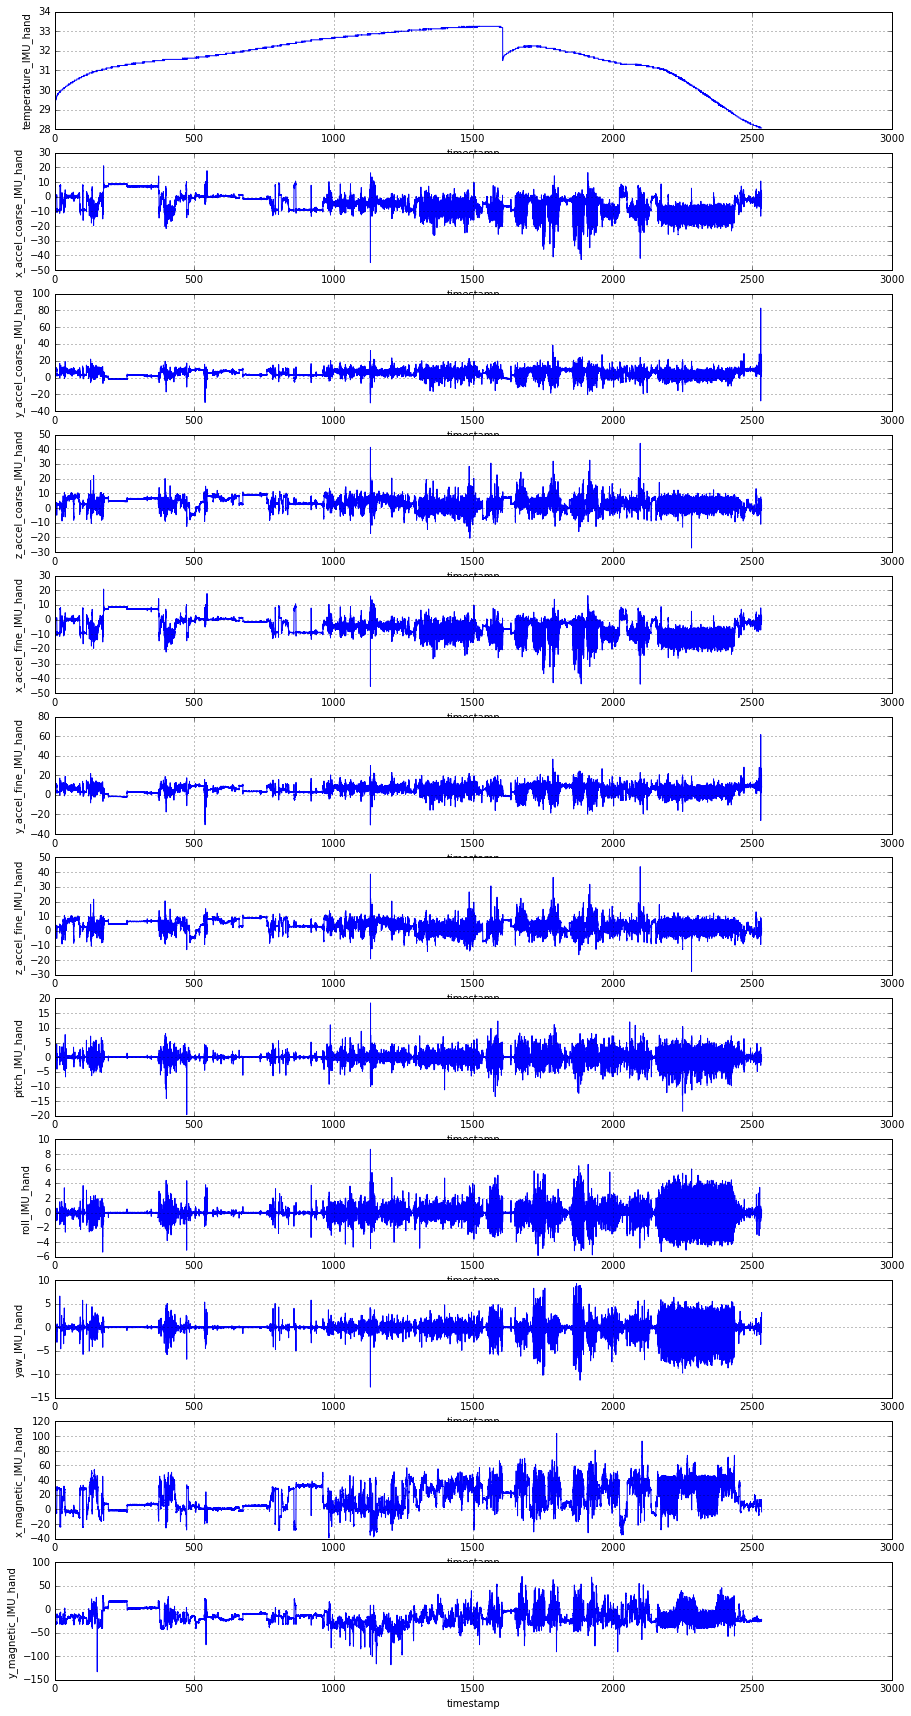

In [76]:
#fig = matplotlib.pyplot.gcf()
#fig.set_size_inches(18.5, 10.5)

fig=plt.figure(figsize=(15,40))
for i in range (3,15):
    print i,df.columns.values[i]
    ax=fig.add_subplot(16,1,i)
    ax.plot(df.iloc[:,0],df.iloc[:,i])
    ax.set_xlabel(df.columns.values[0],fontsize=10)
    ax.set_ylabel(df.columns.values[i],fontsize=10)
    ax.grid(True)
#fig.tight_layout(pad=10)
fig.show()

In [55]:
df = df.drop(df[df.activityID =='0'].index)

In [56]:
coarse_fine_accels=[(4,7),(5,8),(6,9),(21,24),(22,25),(23,26),(38,41),(39,42),(40,43)]
coarse_fine_accels[1][1]
df2=df.iloc[:,coarse_fine_accels[1][1] ]
df.columns.values
for i in range(len(coarse_fine_accels)):
    print df.columns.values[coarse_fine_accels[i][1]]+' vs. ' + df.columns.values[coarse_fine_accels[i][0]] 

x_accel_fine_IMU_hand vs. x_accel_coarse_IMU_hand
y_accel_fine_IMU_hand vs. y_accel_coarse_IMU_hand
z_accel_fine_IMU_hand vs. z_accel_coarse_IMU_hand
x_accel_fine_IMU_chest vs. x_accel_coarse_IMU_chest
y_accel_fine_IMU_chest vs. y_accel_coarse_IMU_chest
z_accel_fine_IMU_chest vs. z_accel_coarse_IMU_chest
x_accel_fine_IMU_ankle vs. x_accel_coarse_IMU_ankle
y_accel_fine_IMU_ankle vs. y_accel_coarse_IMU_ankle
z_accel_fine_IMU_ankle vs. z_accel_coarse_IMU_ankle


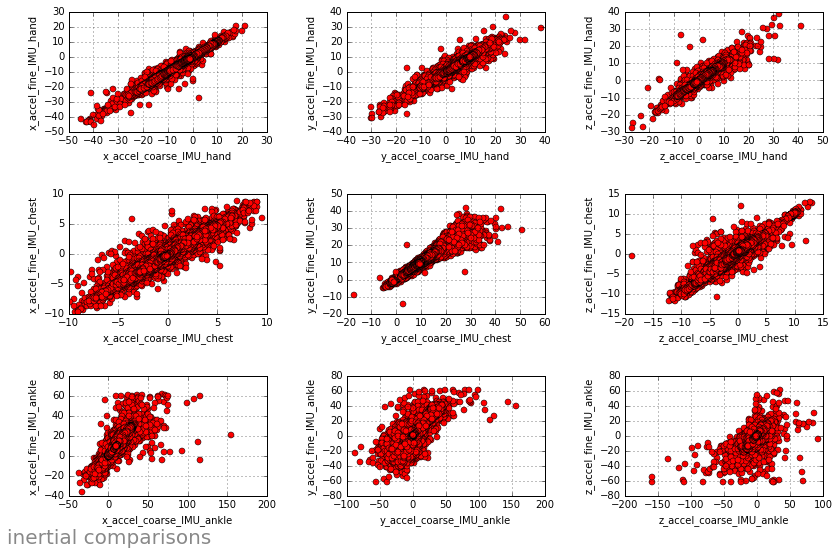

In [57]:
fig=plt.figure(figsize=(12,8))
fig.text(x=0.01,y=0.01,s='inertial comparisons',color='#888888',ha='left',va='bottom',fontsize=20)
for i in range(len(coarse_fine_accels)):
    ax = fig.add_subplot(3,3,i+1)
    ax.plot(df.iloc[:,coarse_fine_accels[i][0]],df.iloc[:,coarse_fine_accels[i][1]],'ro')
    ax.set_xlabel(df.columns.values[coarse_fine_accels[i][0]],fontsize=10)
    ax.set_ylabel(df.columns.values[coarse_fine_accels[i][1]],fontsize=10)
    ax.grid(True)
fig.tight_layout(pad=3)
fig.show()

Somethings wonky with the ankle coarses, because Id expect the data to be in the same range 
The fines for all three IMU's look in the same range-->disregard all coarses7+7-+--

Why do the z's look all wonky

In [44]:
counts = df.groupby('activityID').size()
counts
heartrate_by_activity = df.groupby('activityID')['heart_rate']

In [46]:
heartrate_by_activity.head(n=5)

activityID
1       0
1       0
1       0
1       0
1       0
12      0
12      0
12      0
12      0
12      0
13      0
13      0
13      0
13      0
13      0
16      0
16      0
16     92
16      0
16      0
17      0
17     83
17      0
17      0
17      0
2       0
2      71
2       0
2       0
2       0
3       0
3       0
3       0
3       0
3       0
4       0
4     120
4       0
4       0
4     120
Name: heart_rate, dtype: float64

In [ ]:
#arrange data into list for labels and list of lists for attributes
xList = []
labels = []

for line in data:
    #split on comma
    row = line.strip().split(",")
    xList.append(row)
nrow = len(xList)
ncol = len(xList[1])

type = [0]*3
colCounts = []

#generate summary statistics for column 3 (e.g.)
col = 3
colData = []
for row in xList:
    colData.append(float(row[col]))

colArray = np.array(colData)
colMean = np.mean(colArray)
colsd = np.std(colArray)
sys.stdout.write("Mean = " + '\t' + str(colMean) + '\t\t' +
            "Standard Deviation = " + '\t ' + str(colsd) + "\n")


#calculate quantile boundaries
ntiles = 4

percentBdry = []

for i in range(ntiles+1):
    percentBdry.append(np.percentile(colArray, i*(100)/ntiles))

sys.stdout.write("\nBoundaries for 4 Equal Percentiles \n")
print(percentBdry)
sys.stdout.write(" \n")


#run again with 10 equal intervals
ntiles = 10

percentBdry = []

for i in range(ntiles+1):
    percentBdry.append(np.percentile(colArray, i*(100)/ntiles))

sys.stdout.write("Boundaries for 10 Equal Percentiles \n")
print(percentBdry)
sys.stdout.write(" \n")


#The last column contains categorical variables

col = 60
colData = []
for row in xList:
    colData.append(row[col])

unique = set(colData)
sys.stdout.write("Unique Label Values \n")
print(unique)

#count up the number of elements having each value

catDict = dict(zip(list(unique),range(len(unique))))

catCount = [0]*2

for elt in colData:
    catCount[catDict[elt]] += 1

sys.stdout.write("\nCounts for Each Value of Categorical Label \n")
print(list(unique))
print(catCount)